In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('resume_dataset.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.size

1924

In [7]:
df['cleaned_resume']=''
df.info()
df.duplicated(subset=['Resume']).value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


True     796
False    166
Name: count, dtype: int64

In [8]:
df.drop_duplicates(subset=['Resume'],keep='first',inplace=True)

In [9]:
df.reset_index(inplace=True,drop=True)

In [10]:
df.head

<bound method NDFrame.head of          Category                                             Resume  \
0    Data Science  Skills * Programming Languages: Python (pandas...   
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2    Data Science  Areas of Interest Deep Learning, Control Syste...   
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
..            ...                                                ...   
161       Testing  Computer Skills: â¢ Proficient in MS office (...   
162       Testing  â Willingness to accept the challenges. â ...   
163       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...   
164       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
165       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...   

    cleaned_resume  
0                   
1                   
2                   
3                   


C:\Users\shrey\AppData\Local\Temp\ipykernel_8160\743507105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Category',data=df,palette='Set2')


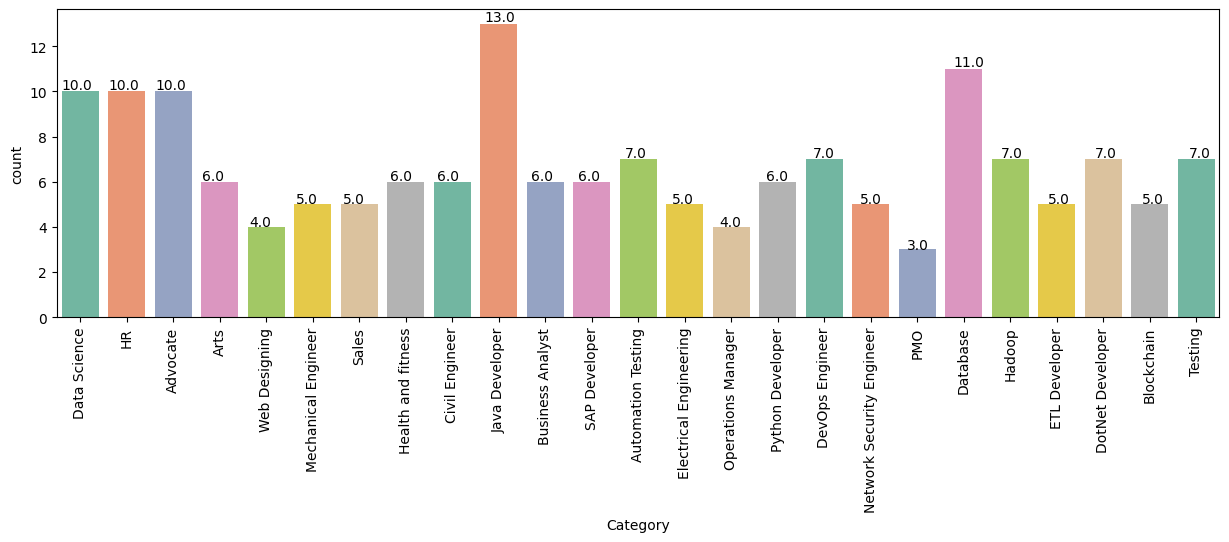

In [11]:
import seaborn as sns
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
ax=sns.countplot(x='Category',data=df,palette='Set2')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.01,p.get_height()*1.01))

In [12]:
import re
def clean(text):
    text=re.sub('http\S+\s*','',text)
    text=re.sub('#\S+','',text)
    text=re.sub('@\S+','',text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),'',text)
    text=re.sub(r'[^\x00-\x7f]',r' ', text)
    text=re.sub('\s+', ' ',text)
    text=re.sub('RT|cc', ' ', text)
    return text
df['cleaned_resume']=df.Resume.apply(lambda x:clean(x))

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shrey\AppData\Local\Temp\ipykernel_8160\1301191698.py:3: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('http\S+\s*','',text)
C:\Users\shrey\AppData\Local\Temp\ipykernel_8160\1301191698.py:4: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('#\S+','',text)
C:\Users\shrey\AppData\Local\Temp\ipykernel_8160\1301191698.py:5: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub('@\S+','',text)
C:\Users\shrey\AppData\Local\Temp\ipykernel_8160\1301191698.py:6: SyntaxWa

In [57]:
df.head(5)

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [58]:
df.drop(columns=['cleaned resume'], inplace=True, errors='ignore')

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
resume_dataset=df.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var=['Category']
for i in var:
    resume_dataset[i]=le.fit_transform(resume_dataset[i])

In [59]:
resume_dataset.head()

,Category,cleaned_resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [19]:
# resume_dataset=resume_dataset.drop(columns=['Resume'])

In [80]:
resume_dataset.drop(columns=['Resume'],inplace=True)

KeyError: "['Resume'] not found in axis"

In [36]:
merge_df=pd.merge(df,resume_dataset,on='cleaned_resume',how ='left')

In [60]:
merge_df.head()

,Category_x,Category_y
0,Data Science,6
1,Data Science,6
2,Data Science,6
3,Data Science,6
4,Data Science,6


In [38]:
merge_df=merge_df.drop(columns=['Resume','cleaned_resume',])

In [39]:
category_df=merge_df.drop_duplicates()

In [61]:
category_df

,Category_x,Category_y
0,Data Science,6
10,HR,12
20,Advocate,0
30,Arts,1
36,Web Designing,24
40,Mechanical Engineer,16
45,Sales,22
50,Health and fitness,14
56,Civil Engineer,5
62,Java Developer,15


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
require_text=resume_dataset['cleaned_resume'].values
require_output=resume_dataset['Category'].values

word_vectorizer=TfidfVectorizer(
                sublinear_tf=True,
                stop_words='english'
)
word_feature=word_vectorizer.fit_transform(require_text)
print('complete')

complete


In [51]:
X_train,X_test,y_train,y_test=train_test_split(word_feature,require_output,test_size=0.2,random_state=0)

In [62]:
X_test.size

5712

In [63]:
print(X_train.size)

21454


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [65]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy_score",accuracy_score(y_pred,y_test))

accuracy_score 0.6764705882352942


In [78]:
res=word_vectorizer.transform(pd.Series(['java ,python, blockchain,engineering']))

In [79]:
print(category_df[category_df['Category_y']==clf.predict(res)[0wowrd_vectorizer]].iloc[:,0])

154    Blockchain
Name: Category_x, dtype: object


In [83]:
import pickle

# Save all important components
with open('resume_classifier.pkl', 'wb') as f:
    pickle.dump({
        'model': clf,
        'label_encoder': le,
        'vectorizer': word_vectorizer
    }, f)

print("Model, vectorizer, and label encoder saved successfully!")


Model, vectorizer, and label encoder saved successfully!


In [84]:
import pickle

# Load the components
with open('resume_classifier.pkl', 'rb') as f:
    data = pickle.load(f)

clf = data['model']
le = data['label_encoder']
word_vectorizer = data['vectorizer']

# Example: Predicting on a new resume text



In [85]:
y_pred=clf.predict(X_test)
y_pred

array([23,  6,  2, 18,  9, 22,  6,  6, 13,  5, 17, 13, 19, 23, 22, 13,  9,
        7, 22, 11,  7,  1, 18, 19,  0, 15,  2,  6, 15, 15, 16, 11, 15,  5])

In [ ]:
new_resume = ["Experienced Python developer with machine learning skills"]
transformed_resume = word_vectorizer.transform(new_resume)
predicted_category_encoded = clf.predict(transformed_resume)[0]
predicted_category = le.inverse_transform([predicted_category_encoded])[0]

print("Predicted Category:", predicted_category)